In [1]:
# Import library and load data
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
url_train = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/train_ctrUa4K_Phuoc.csv'
url_test = 'https://raw.githubusercontent.com/hkfuoc98/Imaginary-Data-Projects/master/Loan_Prediction/test_lAUu6dG_Phuoc.csv'
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)
# backup
train_bak = train
test_bak = test
print(train.shape,test.shape)

(614, 13) (367, 12)


In [2]:
# treat outlier and missing value, standadize data format

# return to original
train = train_bak
test = test_bak
# Treat missing values
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# Based on data inspection and EDA stage, we standardize the format
train['Gender'] = train['Gender'].replace('Male',1).replace('Female',0).astype(float)
train['Married'] = train['Married'].replace('Yes',1).replace('No',0).astype(float)
train['Dependents'] = train['Dependents'].replace('3+',3).astype(float)
train['Education'] = train['Education'].replace('Not Graduate',0).replace('Graduate',1).astype(float)
train['Self_Employed'] = train['Self_Employed'].replace('Yes',1).replace('No',0).astype(float)

# Also introduce new columns
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train['Income_Balance'] = train['Total_Income']/train['EMI']

# Data that are skewed to the right, we apply log function
# train['LoanAmount_Log'] = train['LoanAmount'].apply(lambda x: np.log(x) if x !=0 else 0)
# train['ApplicantIncome_Log'] = train['ApplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
# train['CoapplicantIncome_Log'] = train['CoapplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
train['EMI_Log'] = train['EMI'].apply(lambda x: np.log(x) if x !=0 else 0)
train['Total_Income_Log'] = train['Total_Income'].apply(lambda x: np.log(x) if x !=0 else 0)
train['Income_Balance_Log'] = train['Income_Balance'].apply(lambda x: np.log(x) if x !=0 else 0)

# Drop un-standardized/Original columns
train = train.drop('LoanAmount',axis = 1)
train = train.drop('ApplicantIncome',axis = 1)
train = train.drop('CoapplicantIncome',axis = 1)
train = train.drop('EMI',axis = 1)
train = train.drop('Total_Income',axis = 1)
train = train.drop('Income_Balance',axis = 1)

In [3]:
# do the same for test data
# treat outlier and missing value, standadize data format

# return to original
test = test_bak
test = test_bak
# Treat missing values
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

# Based on data inspection and EDA stage, we standardize the format
test['Gender'] = test['Gender'].replace('Male',1).replace('Female',0).astype(float)
test['Married'] = test['Married'].replace('Yes',1).replace('No',0).astype(float)
test['Dependents'] = test['Dependents'].replace('3+',3).astype(float)
test['Education'] = test['Education'].replace('Not Graduate',0).replace('Graduate',1).astype(float)
test['Self_Employed'] = test['Self_Employed'].replace('Yes',1).replace('No',0).astype(float)

# Also introduce new columns
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
test['Income_Balance'] = test['Total_Income']/test['EMI']

# Data that are skewed to the right, we apply log function
# test['LoanAmount_Log'] = test['LoanAmount'].apply(lambda x: np.log(x) if x !=0 else 0)
# test['ApplicantIncome_Log'] = test['ApplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
# test['CoapplicantIncome_Log'] = test['CoapplicantIncome'].apply(lambda x: np.log(x) if x !=0 else 0)
test['EMI_Log'] = test['EMI'].apply(lambda x: np.log(x) if x !=0 else 0)
test['Total_Income_Log'] = test['Total_Income'].apply(lambda x: np.log(x) if x !=0 else 0)
test['Income_Balance_Log'] = test['Income_Balance'].apply(lambda x: np.log(x) if x !=0 else 0)

# Drop un-standardized/Original columns
test = test.drop('LoanAmount',axis = 1)
test = test.drop('ApplicantIncome',axis = 1)
test = test.drop('CoapplicantIncome',axis = 1)
test = test.drop('EMI',axis = 1)
test = test.drop('Total_Income',axis = 1)
test = test.drop('Income_Balance',axis = 1)

In [4]:
# Build X,y and prepare X_test
X = train.drop('Loan_Status',axis = 1).drop('Loan_ID',axis = 1)
y = train.Loan_Status

X_test = test.drop('Loan_ID',axis = 1)

In [5]:
# Make dummies for categorial features
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [6]:
# Check dimestion before getting started
print(X.shape,X_test.shape,y.shape)

(614, 13) (367, 13) (614,)


In [7]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [8]:
# w Preprocessing
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]

    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(xtr, ytr)  # apply scaling on training data
    score = pipe.score(xvl, yvl)
    print('accuracy_score',score)
    scorelist.append(score)
    i+=1


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147


In [9]:
mean(scorelist)

0.807796881247501

In [10]:
# without Preprocessing
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1,max_iter = 10000)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147


In [11]:
mean(scorelist)

0.8094228975076636

In [12]:
# Decision Tree
from sklearn import tree

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)


1 of kfold 5
accuracy_score 0.6910569105691057

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.7154471544715447

4 of kfold 5
accuracy_score 0.7398373983739838

5 of kfold 5
accuracy_score 0.7049180327868853


In [13]:
mean(scorelist)

0.7084632813541251

In [14]:
# Random forest; without grid search
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.8032786885245902


In [15]:
mean(scorelist)

0.8029321604691456

In [16]:
# CV search for n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth':range(1,20,1),'n_estimators':range(1,200,10)}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3,random_state = 1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': range(1, 200, 10)})

In [17]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=121, random_state=1)

In [18]:
# Random forest; with grid search
from sklearn.ensemble import RandomForestClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators = 121)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147


In [19]:
mean(scorelist)

0.8094228975076636

<AxesSubplot:>

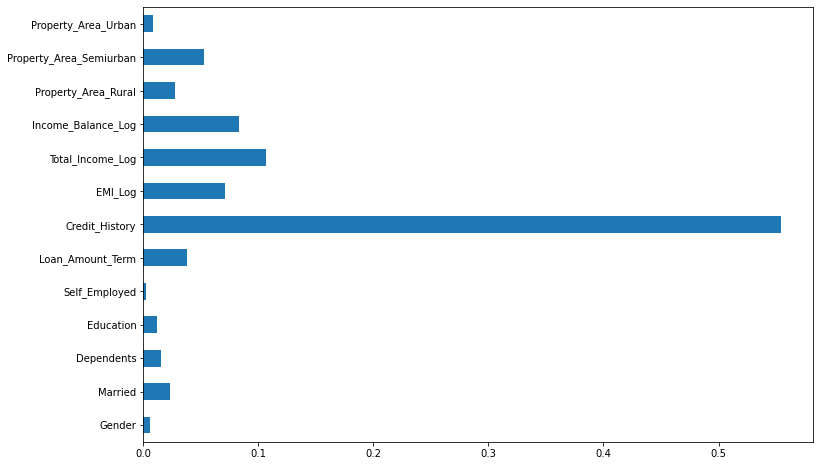

In [20]:
model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators = 121)
model.fit(X, y)
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [21]:
# XG Boost
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = XGBClassifier(random_state=1,max_depth = 3, n_estimators = 50)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
mean(scorelist)

In [ ]:
y = y.replace('N',0).replace('Y',1)
# CV search for n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth':range(1,20,1),'n_estimators':range(1,200,10)}
grid_search = GridSearchCV(XGBClassifier(random_state=1,use_label_encoder=False),paramgrid)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3,random_state = 1)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
# XG Boost
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = XGBClassifier(random_state=1,max_depth = 2, n_estimators = 11,use_label_encoder=False)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)

In [ ]:
mean(scorelist)

In [ ]:
from sklearn.feature_selection import SelectFromModel
# now logistics regression is the best, let's try to add penalty for overfitting using L1 L2
# First, Using L1
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
scorelist = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(random_state=1,max_iter = 10000,penalty='l2',C=1,solver='newton-cg')
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    scorelist.append(score)

In [ ]:
mean(scorelist)

In [ ]:
# Export final result
model = LogisticRegression(random_state=1,max_iter = 10000)
model.fit(X, y)
test['pred'] = model.predict(X_test)
test['pred']=test['pred'].replace(1,'Y').replace(0,'N')
test[['Loan_ID','pred']].to_csv('submission02.csv')